In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('Admission_Predict.csv',header=0,engine='python')
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [3]:
df = df.set_index('Serial No.')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.columns = ['GRE','TOEFL','University_Rank','SOP','LOR','GPA','Research','Chance_of_admit']
df.head()

,GRE,TOEFL,University_Rank,SOP,LOR,GPA,Research,Chance_of_admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


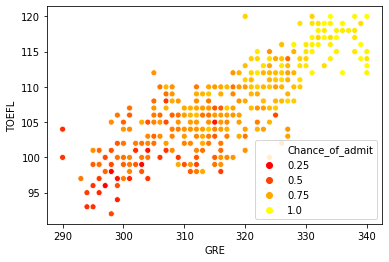

In [6]:
%matplotlib inline
s = sns.scatterplot(x='GRE',y='TOEFL',hue='Chance_of_admit',data= df,palette='autumn')
plt.show(s)


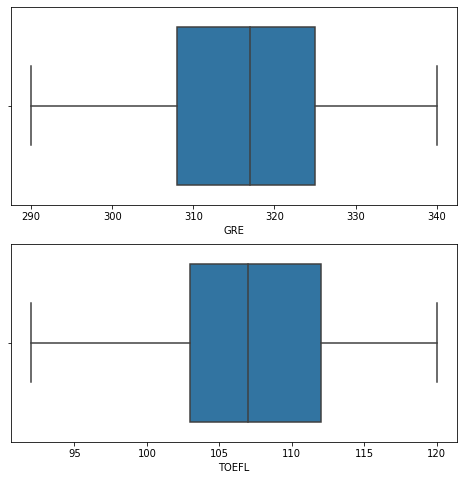

In [7]:
#s = sns.boxplot(x=df["GRE"])
#plt.show(s)
plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
sns.boxplot(x=df["GRE"])
plt.subplot(2, 1, 2)
sns.boxplot(x=df["TOEFL"])

In [8]:
df.University_Rank.value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University_Rank, dtype: int64

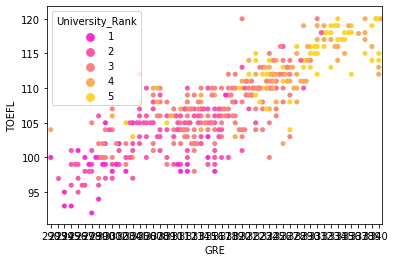

In [9]:
s = sns.swarmplot(x='GRE',y='TOEFL',hue='University_Rank',data= df,palette='spring')
plt.show(s)


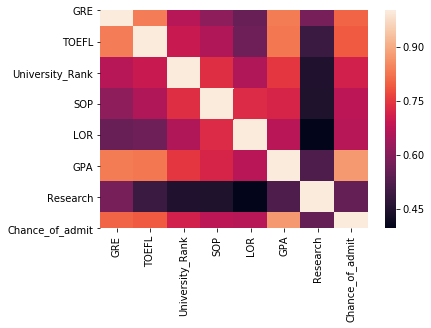

In [10]:
df1 = df.corr(method='pearson')
s = sns.heatmap(data=df1)
plt.show(s)


[]

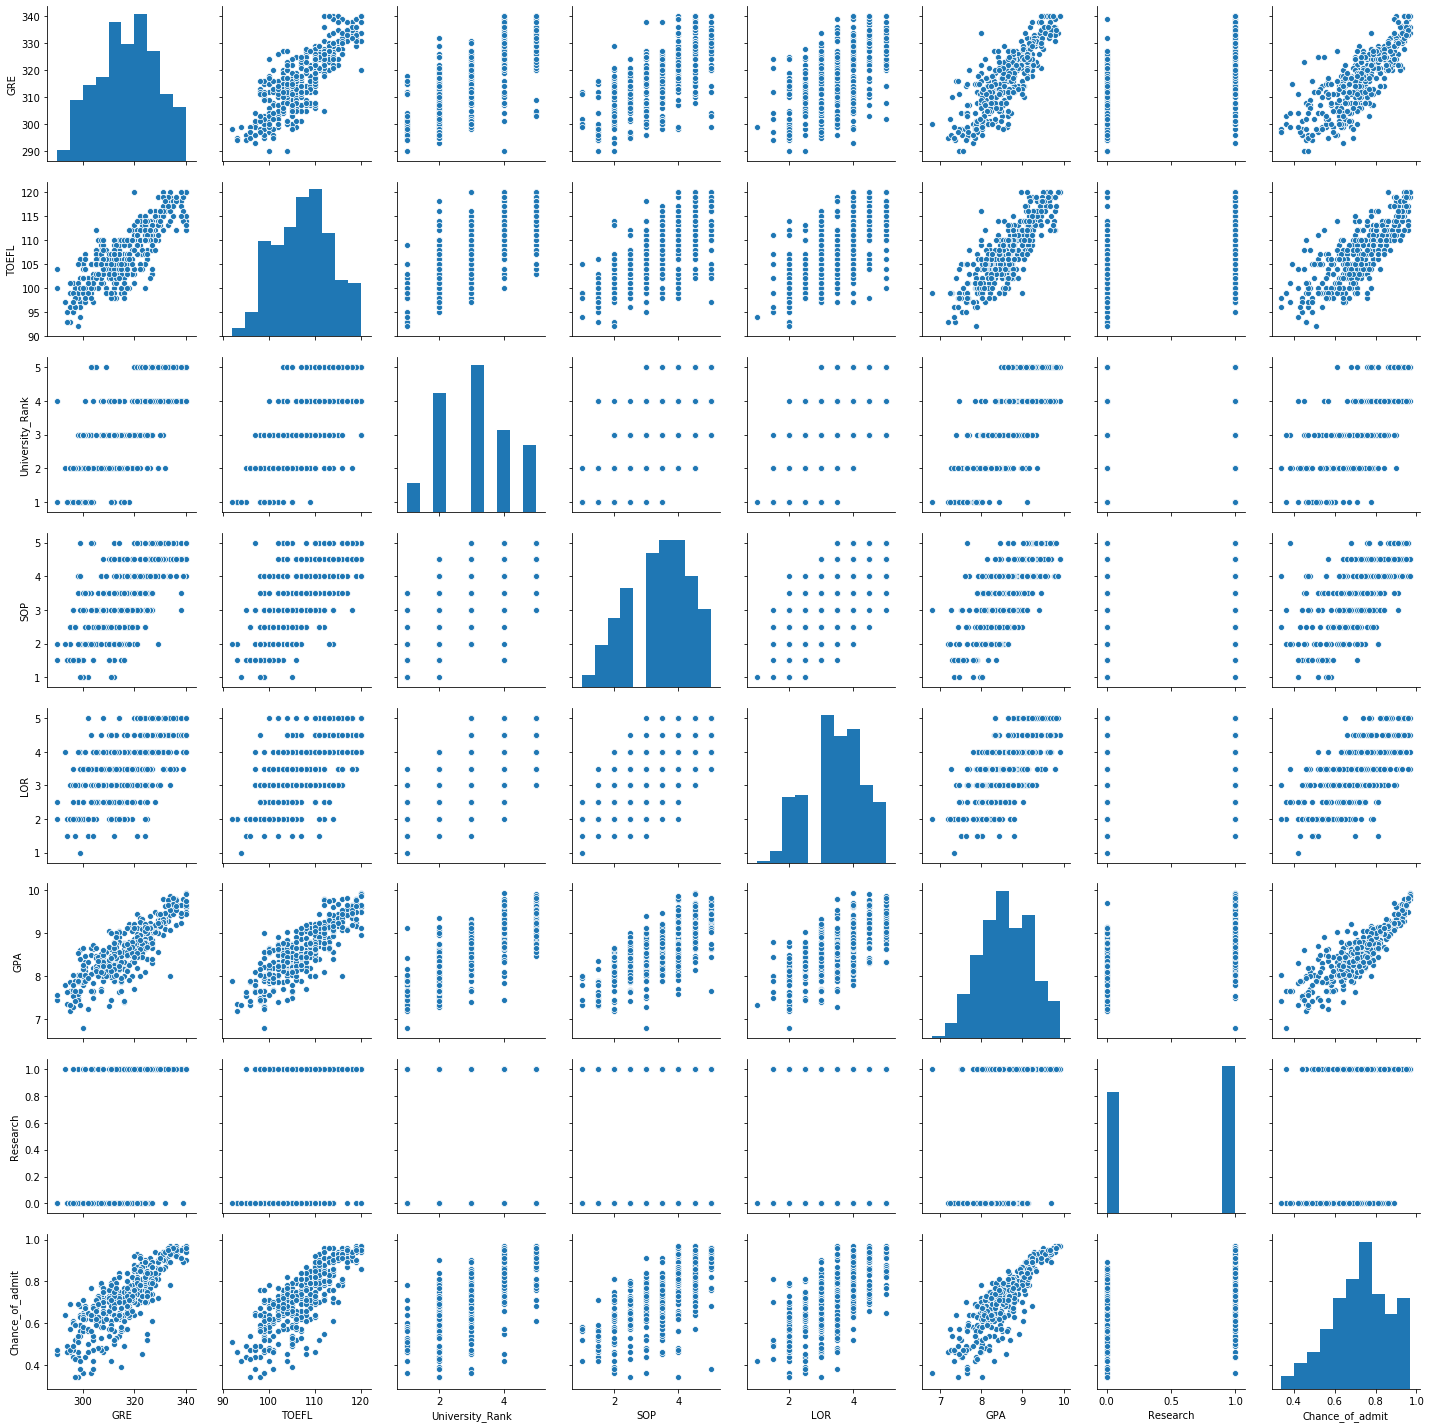

In [11]:
sns.pairplot(data=df,palette='warm')
plt.plot()

[]

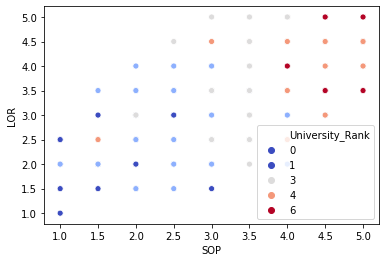

In [12]:
sns.scatterplot(x = df['SOP'], y = df['LOR'], hue = df['University_Rank'], palette='coolwarm')
plt.plot()


In [13]:
#X = np.array(df.loc[:,'GRE':'TOEFL'].values)
#y = np.array(df.loc[:,'Chance_of_admit'].values)
df1 = df[df.University_Rank == 5]    ####predicting chances of getting top ranked school based on GRE & TOEFL score

X = np.array([df1['GRE'],df1['TOEFL']])
y = np.array(df1.Chance_of_admit.values.tolist())

X = np.rollaxis(X,1)
print("X: ",X)

y = y.reshape(60,1)
print("y: ",y)
print("X.Shape: ",X.shape)
print("y.Shape: ",y.shape)



X:  [[330 115]
 [328 116]
 [334 119]
 [336 119]
 [340 120]
 [322 109]
 [340 114]
 [331 112]
 [320 110]
 [326 113]
 [322 110]
 [329 114]
 [339 119]
 [332 118]
 [336 112]
 [321 111]
 [320 110]
 [322 115]
 [340 115]
 [331 116]
 [304 103]
 [305 108]
 [327 104]
 [335 117]
 [334 119]
 [333 118]
 [339 114]
 [303 105]
 [309 105]
 [323 112]
 [333 113]
 [331 115]
 [332 116]
 [321 112]
 [322 110]
 [334 117]
 [335 118]
 [331 115]
 [324 112]
 [324 111]
 [323 110]
 [322 114]
 [336 118]
 [340 120]
 [334 120]
 [333 119]
 [330 116]
 [330 113]
 [326 111]
 [329 114]
 [327 108]
 [329 113]
 [331 116]
 [336 118]
 [324 114]
 [332 118]
 [323 108]
 [324 107]
 [338 115]
 [335 117]]
y:  [[0.9 ]
 [0.94]
 [0.95]
 [0.97]
 [0.94]
 [0.76]
 [0.9 ]
 [0.94]
 [0.88]
 [0.91]
 [0.88]
 [0.86]
 [0.89]
 [0.94]
 [0.96]
 [0.93]
 [0.92]
 [0.92]
 [0.94]
 [0.93]
 [0.68]
 [0.61]
 [0.71]
 [0.94]
 [0.94]
 [0.92]
 [0.96]
 [0.77]
 [0.71]
 [0.79]
 [0.89]
 [0.92]
 [0.94]
 [0.86]
 [0.78]
 [0.89]
 [0.93]
 [0.93]
 [0.88]
 [0.9 ]
 [0.87]
 [0

In [14]:
X=df.drop('Chance_of_admit',axis=1)
y=df['Chance_of_admit']

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=preprocessing.normalize(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()]]

In [16]:
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    print(name,rms)

Results...

Linear Regression : 0.0769745219608656
Decision Tree Regression : 0.11377060252982753
Gradient Boosting Regression : 0.07290929962959299


In [17]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
import pickle
filename = 'AdmissionPred_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [50]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7133295983748287
